In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

df = pd.read_csv("/home/inventor/Datasets/California House Price/Cal_house/housing.csv")

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Fill the Null

df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Change the Datatypes

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df["housing_median_age"] = df["housing_median_age"].astype("int64")
df["total_bedrooms"] = df["total_bedrooms"].astype("int64")
df["total_rooms"] = df["total_rooms"].astype("int64")
df["population"] = df["population"].astype("int64")
df["median_house_value"] = df["median_house_value"].astype("int64")

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126.0,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138.0,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177.0,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219.0,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259.0,3.8462,342200,NEAR BAY


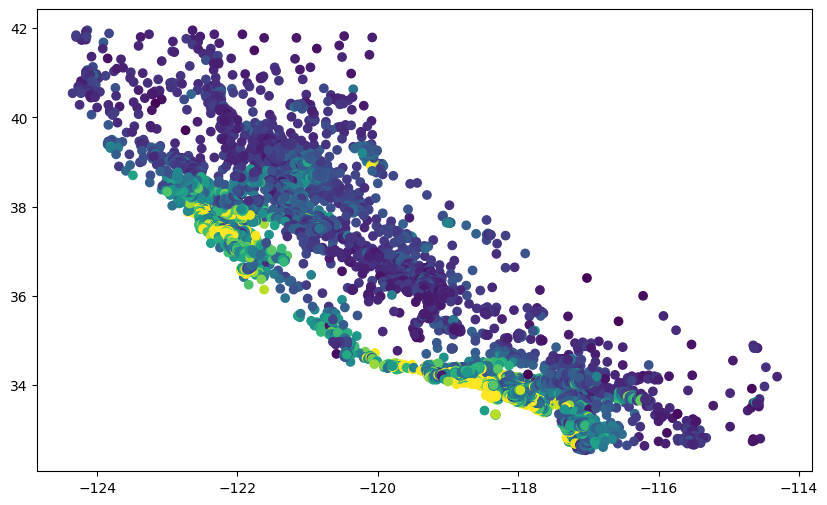

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df["longitude"], df["latitude"], c=df["median_house_value"])

In [19]:
num_cols = [feature for feature in df.columns if df[feature].dtype in ["int64", "float64"]]
cat_cols = [feature for feature in df.columns if df[feature].dtype not in ["int64", "float64"]]

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [26]:
one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first")

encoded = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=one_hot.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.drop("ocean_proximity", axis=1, inplace=True)

In [27]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,1.0,0.0


In [30]:
encoded_df.rename(columns={"median_house_value": "house_price"}, inplace=True)

encoded_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390839,-0.512592,-0.443449,-1.216128,-1.115804,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925118,-0.944405,-1.008420,-0.691593,-1.124470,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126085,-0.369537,-0.174042,-1.142593,-0.992746,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307358,-0.604429,-0.393753,-1.054583,-1.058608,1.0,0.0,0.0,0.0


In [32]:
class PCA_Custom():

    def __init__(self, n_components):

        self.n_components = n_components
        self.variance = None
        self.components = None
        self.explained_variance_ratio = None
    
    def fit(self, X):

        # Center the data
        
        X_centered = X - X.mean()

        # Calculate the cov matrix

        cov_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        sort_indices = np.argsort(eigenvalues)[::-1]

        eigenvalues = eigenvalues[sort_indices]
        eigenvectors = eigenvectors[:, sort_indices]

        self.variance = eigenvalues[:self.n_components]
        self.components = eigenvectors[:, :self.n_components]

        total_variance = np.sum(self.variance)
        self.explained_variance_ratio = eigenvalues / total_variance
    
    def transform(self, X):

        X_centered = X - X.mean()

        return np.dot(X_centered, self.components)


    def fit_transform(self, X):

        self.fit(X)

        return self.transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("house_price", axis=1), encoded_df["house_price"], test_size=0.2, random_state=42)

In [35]:
pca_c = PCA_Custom(n_components=5)

In [36]:
X_train = pca_c.fit_transform(X_train)

X_test = pca_c.transform(X_test)



In [41]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [48]:
class Schostic_Gradient_Descent():

    def __init__(self, learning_rate, epochs):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            for j in range(X_train.shape[0]):

                idx = np.random.randint(X_train.shape[0])

                y_hat = np.dot(X_train[idx], self.coef_)

                error = y_train[idx] - y_hat

                coef_slope = np.dot(error, X_train[idx])

                self.coef_ = self.coef_ + (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)
        return y_pred


In [51]:
sgd = Schostic_Gradient_Descent(learning_rate=0.00001, epochs=500)

In [52]:
sgd.fit(X_train, y_train)

Coef_: [ 0.00365895 -0.03022536  0.04426322 -0.55825137 -0.4998856  -0.45527898]


In [53]:
y_pred = sgd.predict(X_test)

In [54]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5946441358717787